<a href="https://colab.research.google.com/github/WilliamGellenthien/DS-1002/blob/main/Gellenthien_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/ftx-2021-01-01--2023-12-31 (2).csv')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [8]:
df = pd.read_csv('/content/ftx-2021-01-01--2023-12-31 (2).csv', delimiter=';', encoding='utf-8')
#I added this because it was saying that there was only one column, but I knew that was not true based
# on looking at the data

In [9]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 741
Number of columns: 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [13]:
df = df.dropna()
df = df.drop_duplicates()
columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df = df.drop(columns=columns_to_drop)
df.to_csv('modified_dataset.csv', index=False)

KeyError: "['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'] not found in axis"

Now display the first 10 rows of the cleaned dataset.

In [12]:
print(df.head(10))

       open      high       low     close       volume  \
0  0.838968  0.853502  0.835226  0.842688   3001502.06   
1  0.860193  0.864752  0.826643  0.839048   3608615.07   
2  0.885723  0.887118  0.843029  0.860231   3766979.57   
3  0.921162  0.925702  0.869842  0.886091   4192949.85   
4  0.931138  0.955402  0.916414  0.923668   4574953.05   
5  0.894567  1.011183  0.893652  0.930696   7065306.21   
6  0.924432  0.935517  0.894370  0.894657   2577834.83   
7  0.957505  0.975671  0.921085  0.924433   5055004.16   
8  1.027133  1.038282  0.948058  0.957006  17088962.94   
9  0.873973  1.127198  0.835625  1.027162  22418556.51   

                  timestamp  
0  2022-12-31T23:59:59.999Z  
1  2022-12-30T23:59:59.999Z  
2  2022-12-29T23:59:59.999Z  
3  2022-12-28T23:59:59.999Z  
4  2022-12-27T23:59:59.999Z  
5  2022-12-26T23:59:59.999Z  
6  2022-12-25T23:59:59.999Z  
7  2022-12-24T23:59:59.999Z  
8  2022-12-23T23:59:59.999Z  
9  2022-12-22T23:59:59.999Z  


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [19]:
df['close_change'] = df['close'].diff(periods=-1)
print(df.head(10))

       open      high       low     close       volume  \
0  0.838968  0.853502  0.835226  0.842688   3001502.06   
1  0.860193  0.864752  0.826643  0.839048   3608615.07   
2  0.885723  0.887118  0.843029  0.860231   3766979.57   
3  0.921162  0.925702  0.869842  0.886091   4192949.85   
4  0.931138  0.955402  0.916414  0.923668   4574953.05   
5  0.894567  1.011183  0.893652  0.930696   7065306.21   
6  0.924432  0.935517  0.894370  0.894657   2577834.83   
7  0.957505  0.975671  0.921085  0.924433   5055004.16   
8  1.027133  1.038282  0.948058  0.957006  17088962.94   
9  0.873973  1.127198  0.835625  1.027162  22418556.51   

                  timestamp  close_change  
0  2022-12-31T23:59:59.999Z      0.003640  
1  2022-12-30T23:59:59.999Z     -0.021183  
2  2022-12-29T23:59:59.999Z     -0.025860  
3  2022-12-28T23:59:59.999Z     -0.037577  
4  2022-12-27T23:59:59.999Z     -0.007028  
5  2022-12-26T23:59:59.999Z      0.036039  
6  2022-12-25T23:59:59.999Z     -0.029776  
7  2022-1

## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [21]:
positive_growth = df[df['close_change'] > 0]
top_10_positive_growth = positive_growth.sort_values(by='close_change', ascending=False).head(10)
print("Top 10 Days of Positive Growth for FTX:")
print(top_10_positive_growth[['timestamp', 'close_change']])

Top 10 Days of Positive Growth for FTX:
                    timestamp  close_change
492  2021-09-01T23:59:59.999Z     16.677156
468  2021-09-16T23:59:59.999Z      9.864091
487  2021-09-06T23:59:59.999Z      9.800320
692  2021-02-19T23:59:59.999Z      8.335900
592  2021-05-24T23:59:59.999Z      6.333923
673  2021-03-09T23:59:59.999Z      5.529699
515  2021-08-09T23:59:59.999Z      5.325192
485  2021-09-08T23:59:59.999Z      5.239728
625  2021-04-26T23:59:59.999Z      4.504385
611  2021-05-05T23:59:59.999Z      4.488174


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [23]:
df['rate_of_change'] = df['close_change'] / df['close'].shift(1)
print(df.head(10))

       open      high       low     close       volume  \
0  0.838968  0.853502  0.835226  0.842688   3001502.06   
1  0.860193  0.864752  0.826643  0.839048   3608615.07   
2  0.885723  0.887118  0.843029  0.860231   3766979.57   
3  0.921162  0.925702  0.869842  0.886091   4192949.85   
4  0.931138  0.955402  0.916414  0.923668   4574953.05   
5  0.894567  1.011183  0.893652  0.930696   7065306.21   
6  0.924432  0.935517  0.894370  0.894657   2577834.83   
7  0.957505  0.975671  0.921085  0.924433   5055004.16   
8  1.027133  1.038282  0.948058  0.957006  17088962.94   
9  0.873973  1.127198  0.835625  1.027162  22418556.51   

                  timestamp  close_change  rate_of_change  
0  2022-12-31T23:59:59.999Z      0.003640             NaN  
1  2022-12-30T23:59:59.999Z     -0.021183       -0.025137  
2  2022-12-29T23:59:59.999Z     -0.025860       -0.030820  
3  2022-12-28T23:59:59.999Z     -0.037577       -0.043682  
4  2022-12-27T23:59:59.999Z     -0.007028       -0.007932  
5

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [25]:
top_positive_rate_change = df.nlargest(5, 'rate_of_change')

top_negative_rate_change = df.nsmallest(5, 'rate_of_change')

print("Top 5 Days of Greatest Positive Rate Change:")
print(top_positive_rate_change[['timestamp', 'rate_of_change']])

print("\nTop 5 Days of Greatest Negative Rate Change:")
print(top_negative_rate_change[['timestamp', 'rate_of_change']])

Top 5 Days of Greatest Positive Rate Change:
                    timestamp  rate_of_change
53   2022-11-10T23:59:59.999Z        0.469541
492  2021-09-01T23:59:59.999Z        0.276392
692  2021-02-19T23:59:59.999Z        0.264077
48   2022-11-15T23:59:59.999Z        0.222496
24   2022-12-09T23:59:59.999Z        0.221996

Top 5 Days of Greatest Negative Rate Change:
                    timestamp  rate_of_change
55   2022-11-08T23:59:59.999Z       -7.225546
54   2022-11-09T23:59:59.999Z       -0.915079
52   2022-11-11T23:59:59.999Z       -0.443542
50   2022-11-13T23:59:59.999Z       -0.406599
597  2021-05-19T23:59:59.999Z       -0.342939


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

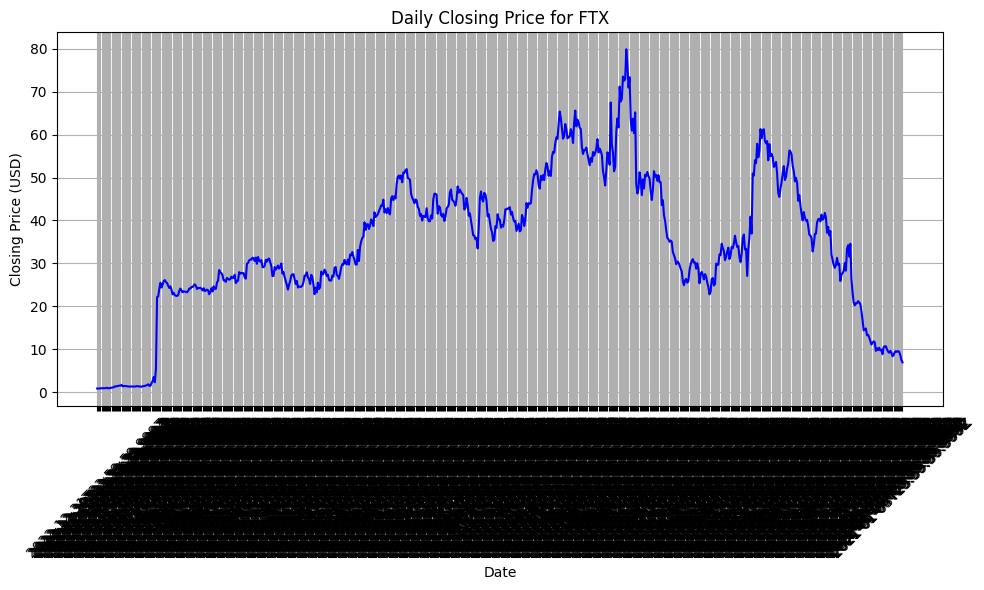

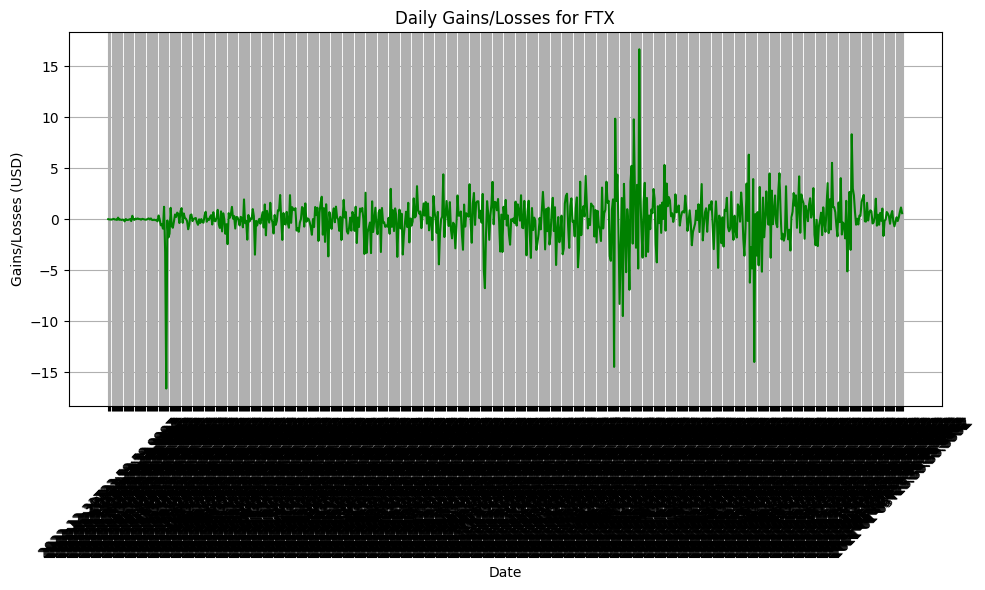

In [28]:
import matplotlib.pyplot as plt
# this is the daily closing price line plot
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['close'], color='blue')
plt.title('Daily Closing Price for FTX')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# this is the daily gains/ losses line plot
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['close_change'], color='green')
plt.title('Daily Gains/Losses for FTX')
plt.xlabel('Date')
plt.ylabel('Gains/Losses (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

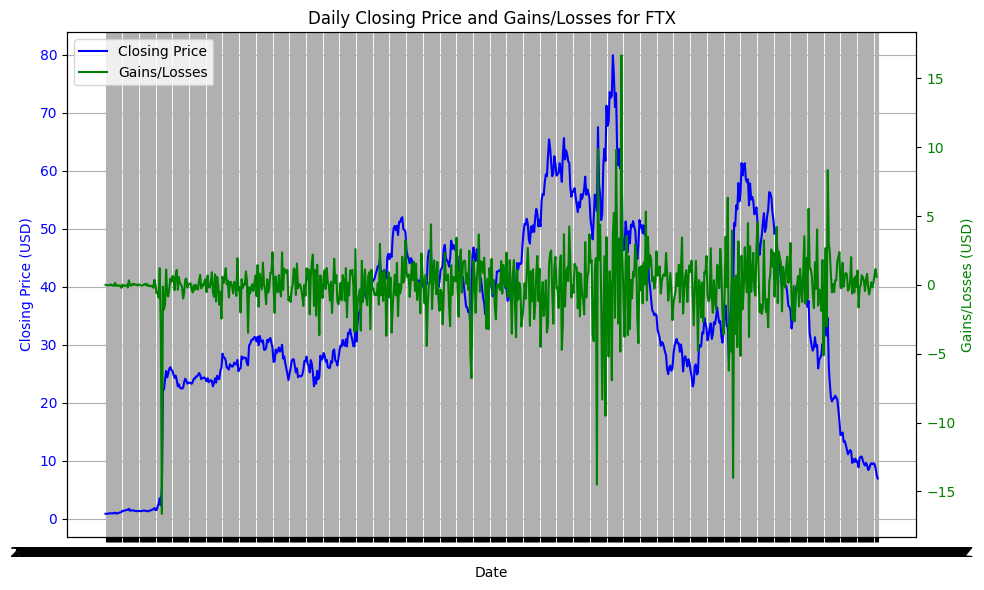

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# This is plotitng the daily closing price on the Y-axis
ax1.plot(df['timestamp'], df['close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# This is creating the second y axis
ax2 = ax1.twinx()
ax2.plot(df['timestamp'], df['close_change'], color='green', label='Gains/Losses')
ax2.set_ylabel('Gains/Losses (USD)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# This is adding the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

#this is rotating the x axis
plt.xticks(rotation=45)

plt.title('Daily Closing Price and Gains/Losses for FTX')
plt.tight_layout()
plt.show()